# Wine quality dataset EDA 

FIAP - 10IA

Conceitos Estatísticos para IA

Análise exploratória de dados (EDA)

### Imports

In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Load Dataset

In [289]:
data = pd.read_csv('../dataset/portugal_wine_quality.csv', sep=';', decimal=',')
target = data['quality']
data = data.drop(['id_vinho'], axis=1)

### Data cleaning

Primeiro, a variável target 'quality' é removida do dataframe principal, uma vez que ela é necessária apenas na etapa de modelagem do algorítmo de regressão/classificação.

As informações de 'quality' são salvas na variável 'target'.

A variável 'id_vinho' também é removida do dataframe, uma vez que a mesma não agrega nenhuma informação útil ao problema.

In [290]:
data = data.replace({'WHITE': "Branco", 'RED': "Tinto"})

Também é verificado a existência de valores nulos no dataset :

In [227]:
print("Existem valores nulos no dataset? -> {}".format(data.isnull().values.any()))

Existem valores nulos no dataset? -> False


# Primeira Parte

### 1.1 EDA

#### 1.1.1 Descrição geral de variáveis

O dataset é composto pelos seguintes atributos:

<br>

- id_vinho : id de identificação de um vinho.

- fixed acidity : a maioria dos ácidos presentes no vinho (fixos/não voláteis), de difícil evaporação.

- volatile acidity : quantidade de ácido acético presente em um vinho, altas quantidades trazem um gosto de vinagre.

- citric acid : um ácido que em pequenas quantidas traz um frescor ao sabor do vinho.

- residual sugar : quantidade de açúcar restante no vinho após o processo de fermentação.

- chlorides : quantidade de sal no vinho.

- free sulfur dioxide : SO2 livre existente no vinho, leva ao equilíbiro de boas bacterias melhorando o aroma e a cor do vinho.

- total sulfur dioxide : quantidade total de SO2 livre encontrado no vinho.

- density : densidade em comparação a água, dependendo do teor de álcool e açúcar.

- ph : define o nível de acidez do vinho.

- sulphates : contribui para os níveis de gás de dióxido de enxofre, com ação antimicrobiano e antioxidante.

- alcohol : teor alcoólico do vinho.

- quality : variável dependente identificando a qualidade do vinho, de 0 a 10.
<br>

#### 1.1.2 Análise da variável dependente 'quality'

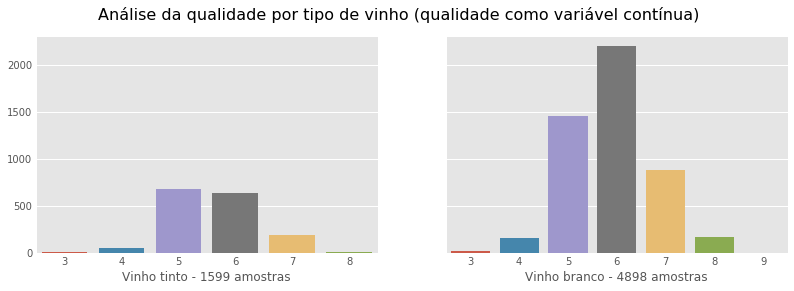

In [276]:
f, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)
f.suptitle("Análise da qualidade por tipo de vinho (qualidade como variável contínua)", fontsize = 16)

red_wine_counts = (data[data['Vinho'] == 'Tinto'])['quality'].value_counts()
white_wine_counts = (data[data['Vinho'] == 'Branco'])['quality'].value_counts()

ax1 = sns.barplot(list(red_wine_counts.index), list(red_wine_counts.values), ax=axes[0])
ax1.set(xlabel="Vinho tinto - {} amostras".format(red_wine_counts.sum()))

ax2 = sns.barplot(list(white_wine_counts.index), list(white_wine_counts.values), ax=axes[1])
ax2.set(xlabel="Vinho branco - {} amostras".format(white_wine_counts.sum()))

plt.show()

Comparando os vinhos tinto e branco, podemos estabelecer duas observações :

<br>

- Possuímos muito mais exemplos da classe de vinhos brancos do que vinhos tintos (desbalanceamento dentro da variável 'tipo')
- Desbalanceamento entre os valores da variável target (muitas amostras de qualidade 5, 6 e 7 mas poucas de demais valores)

<br>

Observando o desbalanceamento da variável target assumindo o formato categórico, temos :

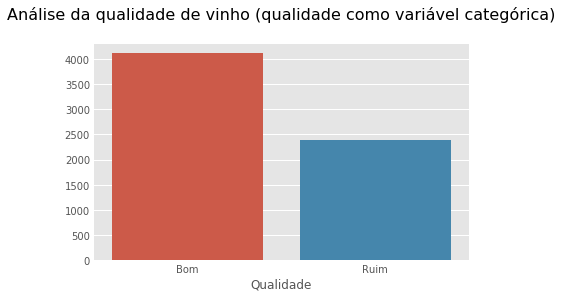

In [339]:
wine_categ = data.copy()
wine_categ['quality'] = wine_categ.quality.apply(lambda i: "Bom" if i >= 6 else "Ruim")
ct = (wine_categ['quality']).value_counts()
ax3 = sns.barplot(ct.index, ct.values)
ax3.set_title("Análise da qualidade de vinho (qualidade como variável categórica)\n", fontsize=16)
ax3.set(xlabel="Qualidade")
plt.show()

Temos praticamente 60% mais amostras de vinhos da classe "Bom" do que da classe "Ruim".

<br>

Para um algorítmo de regressão, isso pode não se tornar um grande problema. Essa realidade muda assim que passamos a utilizar um algorítimo de classificação, por serem sensíveis ao desbalanceamento de classes. 

Vamos assumir o seguinte exemplo : suponha que possuímos 90 amostras de vinhos bons e 10 amostras de vinhos ruins. Um modelo de classificação treinado sob essas circunstâncias, poderia classificar todas as amostras como vinhos bons e ainda assim ter um alto score de acurácia, mesmo errando todas as amostras de vinhos ruins. 

Um modelo treinado em um conjunto de amostras desbalanceado tende a ter um alto bias a favor da classe mais comum.

<br>

TODO : Falar sobre as técnicas para resolução de desbalanceamento (oversamping/undersampling)

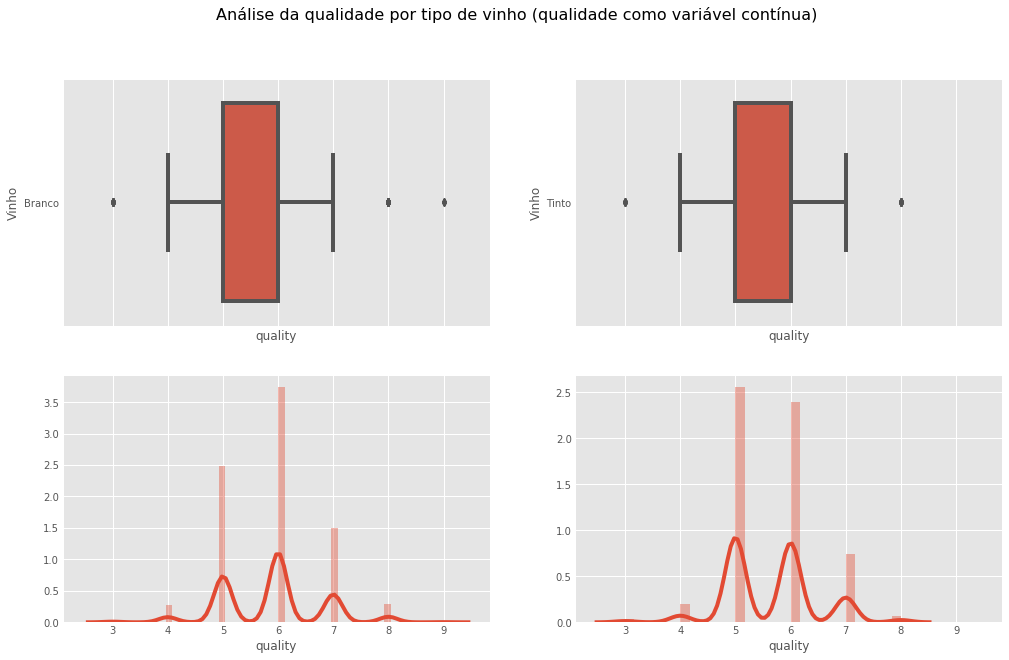

In [340]:
red_wine = data.loc[data['Vinho'] == 'Tinto']
white_wine = data.loc[data['Vinho'] == 'Branco']

f1, axes1 = plt.subplots(2, 2, figsize=(15,10), sharex=True)
f1.suptitle("Análise da qualidade por tipo de vinho (qualidade como variável contínua)", fontsize = 16)

ax1 = sns.boxplot(y=white_wine['Vinho'], x=white_wine['quality'], ax=axes1[0,0])
ax2 = sns.boxplot(y=red_wine['Vinho'], x=red_wine['quality'], ax=axes1[0,1])
ax3 = sns.distplot(white_wine['quality'], ax=axes1[1,0])
ax4 = sns.distplot(red_wine['quality'], ax=axes1[1,1])

Como primeiro passo, podemos realizar uma análise da normalidade da variável dependente/target 'quality' :

In [341]:
print("Fator de skeweness : {}".format(target.skew()))
print("Kurtosis : {}".format(target.kurtosis()))
print("Mediana : {}".format(target.median()))
print(target.describe())

Fator de skeweness : 0.18962269337269674
Kurtosis : 0.2323222693432636
Mediana : 6.0
count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


A variável target apresenta os seguintes coeficientes de distirbuição :

<br>

- Fator de skeweness - 0.1896
- Kurtosis - 0.2323

<br>

Uma primeira observação que pode ser feita através do gráfico é a da variável target possuir ums distribuição multimodal, fato o qual é confirmado através da proximidade dos valores da mediana(6.0) e média(5.81).

#### 1.1.3 Análise das variáveis independentes

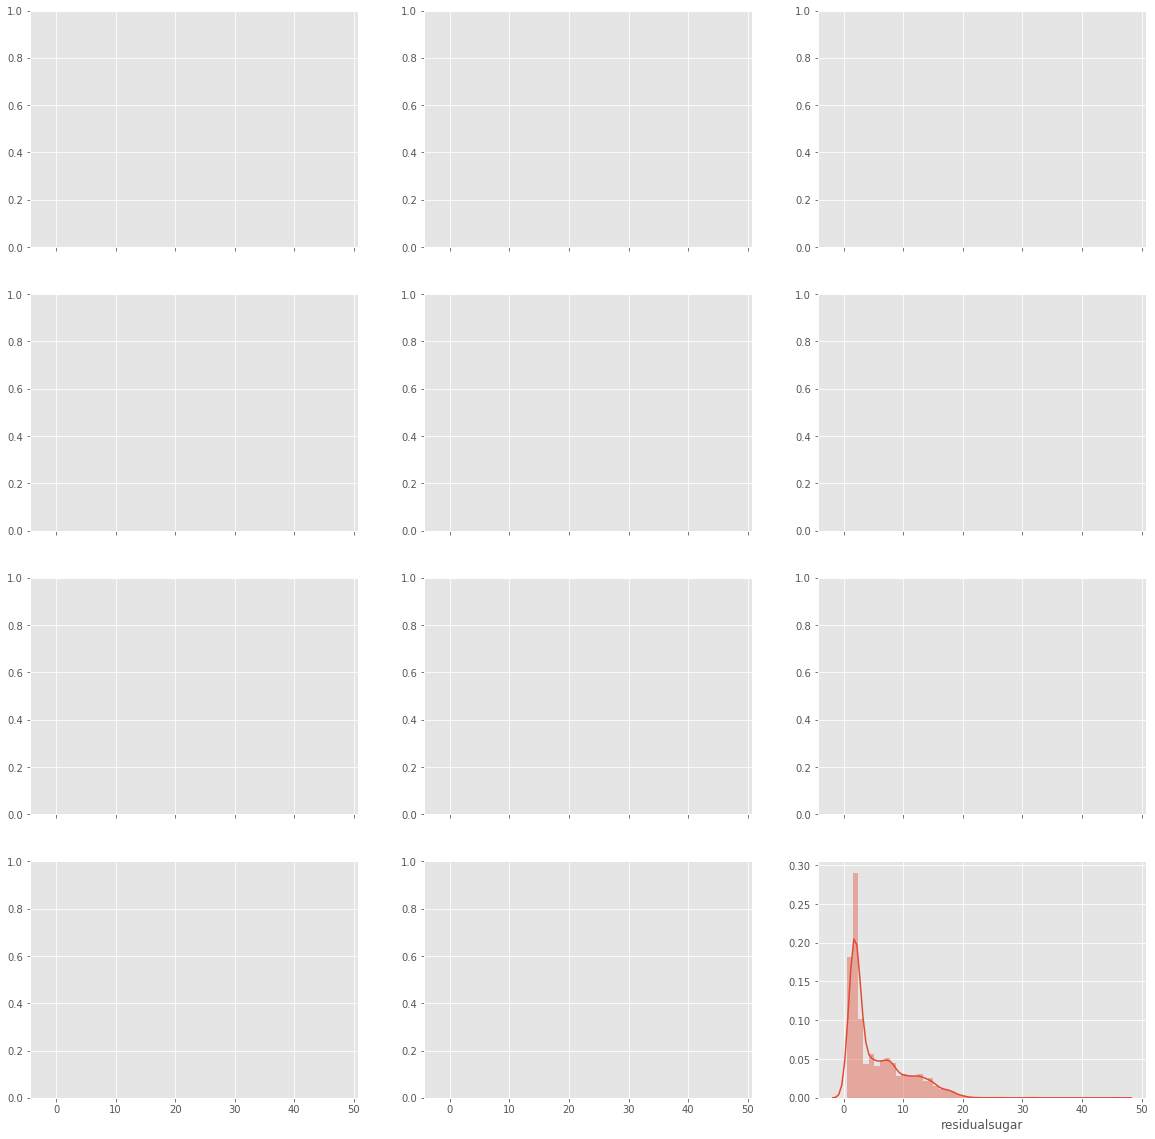

In [100]:
f, axes = plt.subplots(4, 3, figsize=(20,20), sharex=True)
sns.distplot(data['residualsugar'])

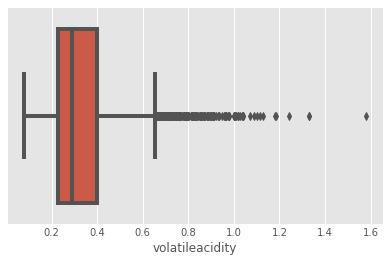

In [342]:
sns.boxplot(data['volatileacidity'])

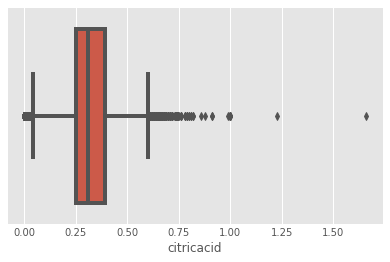

In [343]:
sns.boxplot(data['citricacid'])